In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
df= pd.read_csv(r'C:\Users\Student\Desktop\4nm21ai065\datasets\Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Create feature set and target set
x=df.iloc[:, 3:13]
y=df.iloc[:, 13]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [4]:
# Categorical Encoding using dummies
geography= pd.get_dummies(x['Geography'], drop_first=True, dtype=int)
gender=pd.get_dummies(x['Gender'], drop_first=True, dtype=int)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [5]:
# Concatenate the dataframes
x= pd.concat([x, geography, gender], axis=1)
x= x.drop(['Geography','Gender'], axis=1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [6]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test= tts(x, y, test_size=0.2, random_state=3)

In [7]:
# Feature scaling to reduce the time for calculation of weights
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [8]:
# Creation of ANN Model
import keras
from keras.models import Sequential
from keras.layers import Dense

In [9]:
# Initialisation of ANN
classifier= Sequential()

In [10]:
# Adding the input layer and the fist hidden layer
classifier.add(Dense(6, kernel_initializer= 'he_uniform',activation='relu', input_dim=11))

In [11]:
#Adding the second layer
classifier.add(Dense(6, kernel_initializer='he_uniform', activation='relu'))
#Adding the output layer
classifier.add(Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [12]:
# compiling the ann model
classifier.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
#Fitting the ANN to the training set
model_history=classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=10)

Epoch 1/10
536/536 [==============================] - 1s 1ms/step - loss: 0.7470 - accuracy: 0.5473 - val_loss: 0.6217 - val_accuracy: 0.7134
Epoch 2/10
536/536 [==============================] - 0s 857us/step - loss: 0.5611 - accuracy: 0.7774 - val_loss: 0.5161 - val_accuracy: 0.8016
Epoch 3/10
536/536 [==============================] - 0s 857us/step - loss: 0.5014 - accuracy: 0.7964 - val_loss: 0.4775 - val_accuracy: 0.8054
Epoch 4/10
536/536 [==============================] - 0s 860us/step - loss: 0.4730 - accuracy: 0.8020 - val_loss: 0.4543 - val_accuracy: 0.8099
Epoch 5/10
536/536 [==============================] - 0s 835us/step - loss: 0.4534 - accuracy: 0.8078 - val_loss: 0.4390 - val_accuracy: 0.8152
Epoch 6/10
536/536 [==============================] - 0s 820us/step - loss: 0.4391 - accuracy: 0.8130 - val_loss: 0.4274 - val_accuracy: 0.8217
Epoch 7/10
536/536 [==============================] - 0s 837us/step - loss: 0.4274 - accuracy: 0.8166 - val_loss: 0.4179 - val_accuracy: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<function matplotlib.pyplot.show(close=None, block=None)>

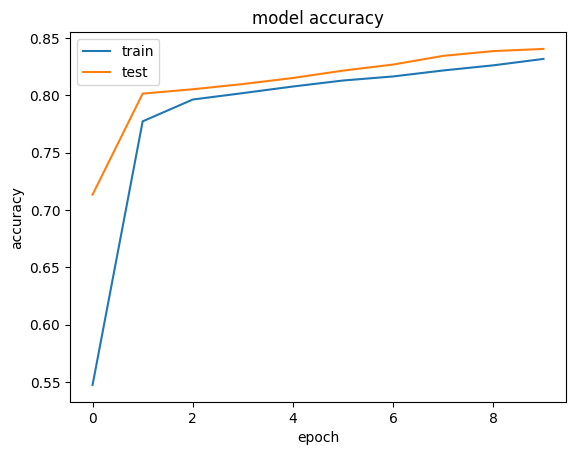

In [14]:
#List all data in history
print(model_history.history.keys())
#Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

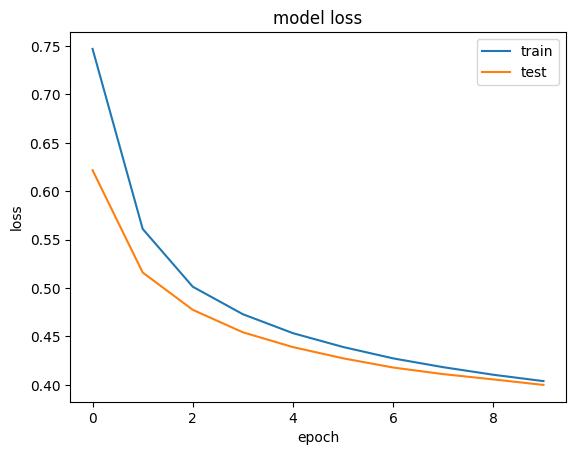

In [15]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.show